In [1]:
%matplotlib inline

import matplotlib

In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ustate = basis(3, 0)
excited = basis(3, 1)
ground = basis(3, 2)
N = 2 # Set where to truncate Fock state for cavity
sigma_ge = tensor(qeye(N), ground * excited.dag())  # |g><e|
sigma_ue = tensor(qeye(N), ustate * excited.dag())  # |u><e|
a = tensor(destroy(N), qeye(3))
ada = tensor(num(N), qeye(3))
c_ops = []  # Build collapse operators
kappa = 1.5 # Cavity decay rate
c_ops.append(np.sqrt(kappa) * a)
gamma = 6  # Atomic decay rate
c_ops.append(np.sqrt(5*gamma/9) * sigma_ue) # Use Rb branching ratio of 5/9 e->u
c_ops.append(np.sqrt(4*gamma/9) * sigma_ge) # 4/9 e->g
t = np.linspace(-15, 15, 100) # Define time vector
psi0 = tensor(basis(N, 0), ustate) # Define initial state
state_GG = tensor(basis(N, 1), ground) # Define states onto which to project
sigma_GG = state_GG * state_GG.dag()
state_UU = tensor(basis(N, 0), ustate)
sigma_UU = state_UU * state_UU.dag()
g = 5  # coupling strength
H0 = -g * (sigma_ge.dag() * a + a.dag() * sigma_ge)  # time-independent term
H1 = (sigma_ue.dag() + sigma_ue)  # time-dependent term

In [4]:
def H1_coeff(t, args):
    return 9 * np.exp(-(t / 5.) ** 2)

In [5]:
H = [H0,[H1,H1_coeff]]

In [25]:
output = mesolve(H, psi0*psi0.dag(), t, [], [])

In [26]:
q = []
for i in output.states:
    q.append(i.full())
q

[array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]),
 array([[  9.99999865e-01 +0.00000000e+00j,
           0.00000000e+00 +2.78979833e-04j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           2.39968890e-04 +0.00000000e+00j],
        [  0.00000000e+00 -2.78979833e-04j,
           7.80441750e-08 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 -6.68541786e-08j],
        [  0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+0

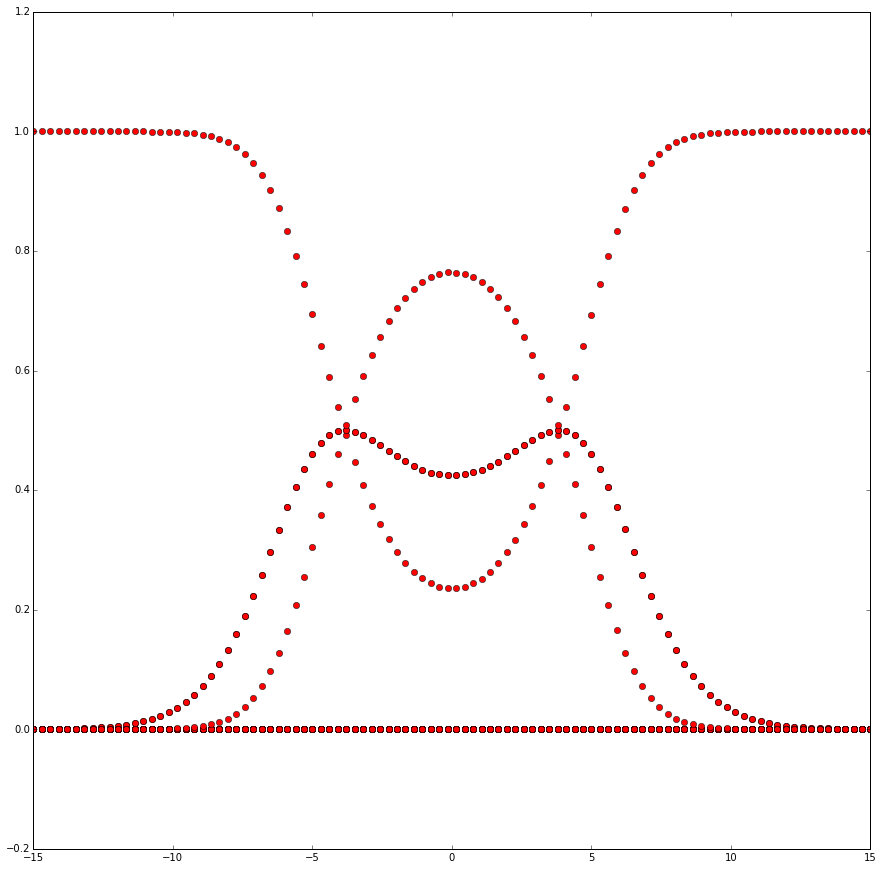

In [27]:
plt.figure(figsize=(15,15))
for i in range(len(q)):
    for j in range(len(q[i])):
        plt.plot([t[i]]*len(q[i]), q[i][j].real, 'ro')
    # print t[i], q[i][0]

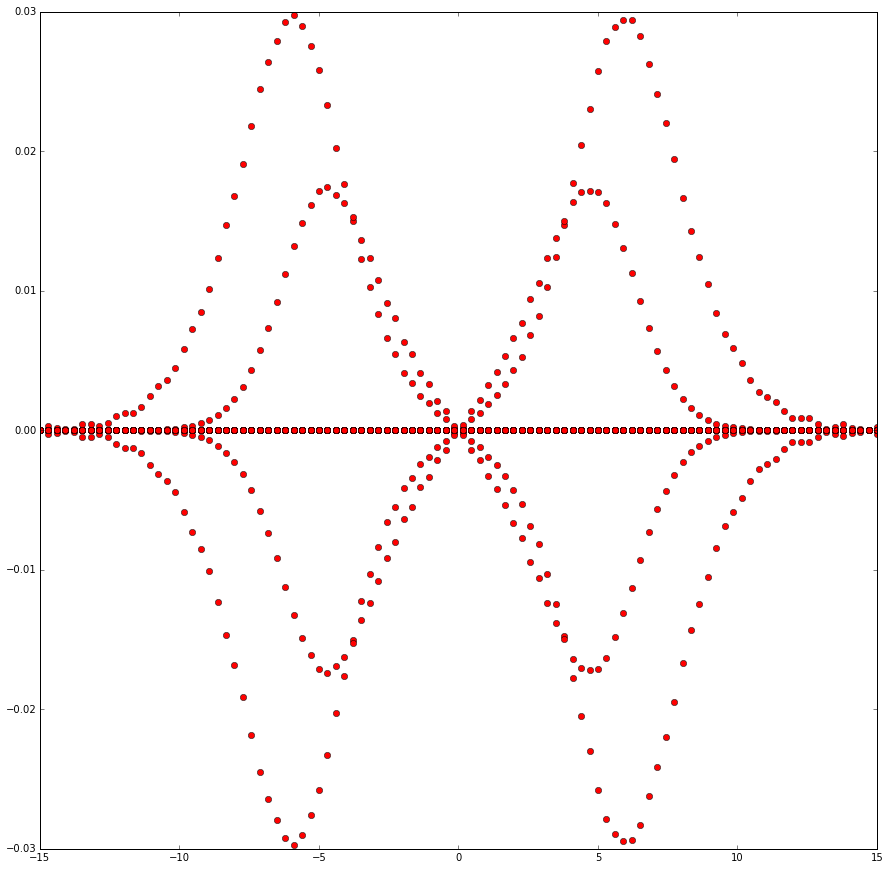

In [28]:
plt.figure(figsize=(15,15))
for i in range(len(q)):
    for j in range(len(q[i])):
        plt.plot([t[i]]*len(q[i]), q[i][j].imag, 'ro')

In [29]:
output_1 = mesolve(H, psi0*psi0.dag(), t, c_ops, [])

In [30]:
q_1 = []
for i in output_1.states:
    q_1.append(i.full())
q_1

[array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]]),
 array([[  9.99999909e-01 +0.00000000e+00j,
           0.00000000e+00 +2.06990724e-04j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           1.79275701e-04 +0.00000000e+00j],
        [  0.00000000e+00 -2.06990724e-04j,
           4.28892546e-08 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 -3.72306629e-08j],
        [  0.00000000e+00 +0.00000000e+00j,
           0.00000000e+00 +0.00000000e+0

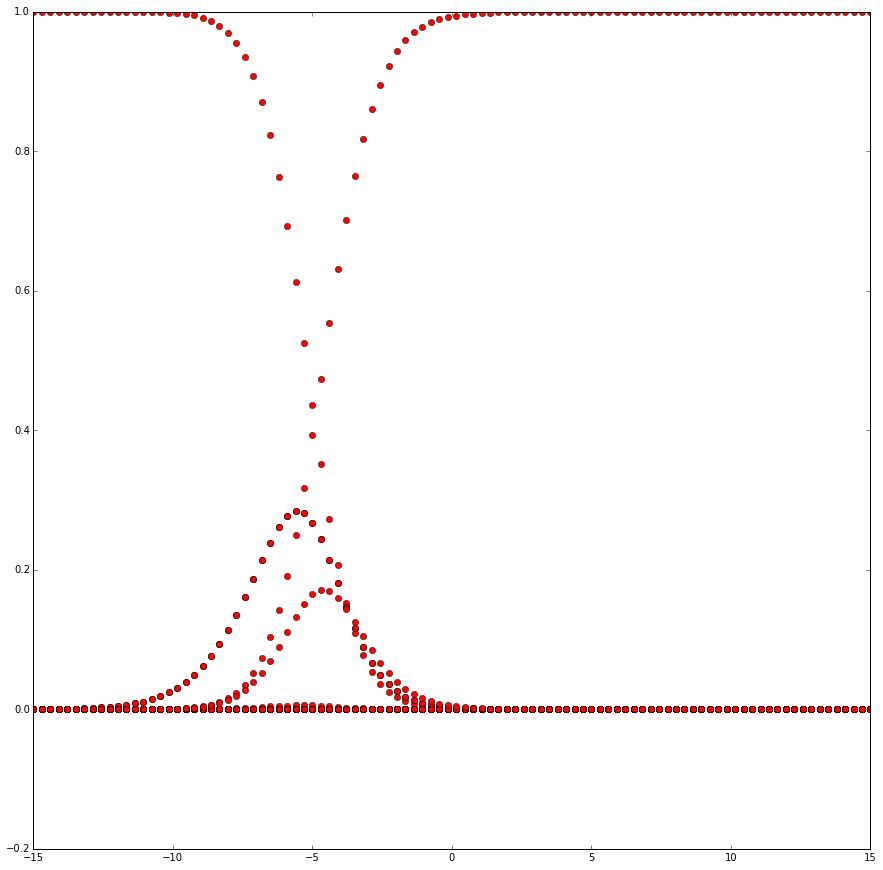

In [31]:
plt.figure(figsize=(15,15))
for i in range(len(q_1)):
    for j in range(len(q_1[i])):
        plt.plot([t[i]]*len(q_1[i]), q_1[i][j].real, 'ro')
    # print t[i], q[i][0]

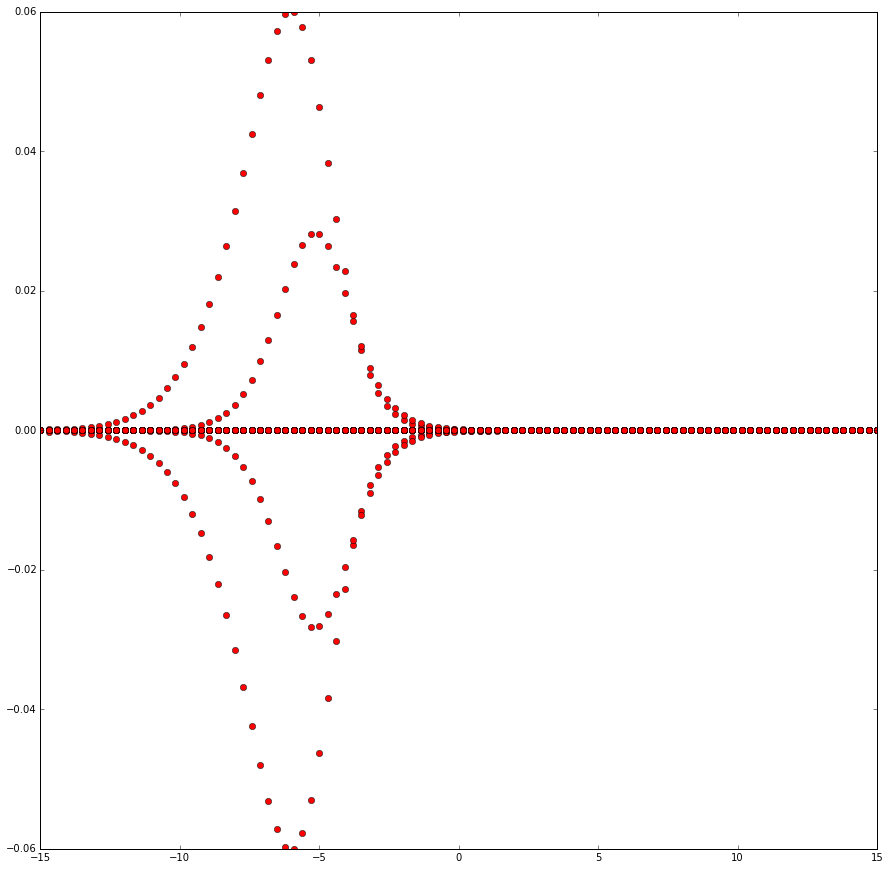

In [32]:
plt.figure(figsize=(15,15))
for i in range(len(q_1)):
    for j in range(len(q_1[i])):
        plt.plot([t[i]]*len(q_1[i]), q_1[i][j].imag, 'ro')